In [1]:
from base_functions import node, element_linear, element_nonlinear, system_from_mdpa

filename = "./Example_mdpas/E3.mdpa"
fix_mps = {
    "all": ["fixAll"],
    "x" : [],
    "y" : [],
    "z" : []
}

mp = {
    "claw": "StVenant",
    "YoungsModulus" : 1000000.0
}

s_l = system_from_mdpa(filename, fix_mps, material_parameters=mp, cross_area=0.01,linear_system=True)
s_nl = system_from_mdpa(filename, fix_mps, material_parameters=mp, cross_area=0.01,linear_system=False)

s_l.find_node(2,s_l.nodes).force[0] = 1000.0
s_l.find_node(2,s_l.nodes).force[2] = 2000.0

s_nl.find_node(2,s_nl.nodes).force[0] = 1000.0
s_nl.find_node(2,s_nl.nodes).force[2] = 2000.0

In [2]:
# solving nonlinear trusses
s_nl.solve_inverse_problem()

# solving linear trusses
s_l.solve_inverse_problem()

 >> starting to solve inverse problem
disp residual:  1.045825e+00   |   force residual:  2.236068e+03
disp residual:  7.189153e-01   |   force residual:  2.064927e+03
disp residual:  3.135727e-01   |   force residual:  8.629328e+02
disp residual:  4.590965e-02   |   force residual:  1.664269e+02
disp residual:  1.257852e-03   |   force residual:  4.025057e+00
disp residual:  7.648212e-07   |   force residual:  2.521036e-03
disp residual:  3.182063e-13   |   force residual:  1.200734e-09
disp residual:  5.630977e-16   |   force residual:  1.455902e-12
 >> inverse problem solved
 >> starting to solve inverse problem
disp residual:  1.045825e+00   |   force residual:  2.236068e+03
disp residual:  5.068388e-01   |   force residual:  5.143142e+03
disp residual:  1.594000e-01   |   force residual:  8.508208e+02
disp residual:  2.951582e-02   |   force residual:  8.273419e+01
disp residual:  3.645082e-04   |   force residual:  3.796737e+00
disp residual:  1.730462e-07   |   force residual:  

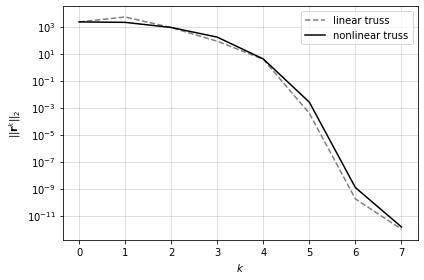

In [3]:
s_l.plot_convergence(label_text="linear truss")
s_nl.plot_convergence(label_text="nonlinear truss")
s_l.show_plot()
#s_l.save_plot_pdf("convergence_plot")

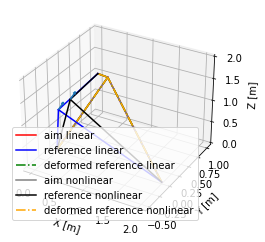

In [4]:
#%matplotlib qt 
fig, ax = s_l.create_plot_figures_3d()
plot_figures = {"fig":fig, "ax":ax}
s_l.plot(["aim","ref","extra"], plot_figures)
s_nl.plot(["aim","ref","extra"], plot_figures)
s_l.show_plot()

In [5]:
print(s_l.find_node(2,s_l.nodes).x)
print(s_l.find_node(2,s_l.nodes).y)
print(s_l.find_node(2,s_l.nodes).z)

0.4775519165819388
-0.4802572696028726
1.4935108461479616


In [6]:
print(s_nl.find_node(2,s_nl.nodes).x)
print(s_nl.find_node(2,s_nl.nodes).y)
print(s_nl.find_node(2,s_nl.nodes).z)

0.6553972454362691
-0.424638016434548
1.735432507307086
